<a href="https://colab.research.google.com/github/yamna20/CERN-COLLISION-DATA/blob/main/Copy_of_electron_mass_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTING ELECTRON MASS USING REGRESSION ALGORITHM




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
url = '/content/dielectron.csv'


In [ ]:
data = pd.read_csv('/content/dielectron.csv')

In [ ]:
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [ ]:
data.dropna(inplace=True)


In [ ]:
data.drop(columns=['Run', 'Event'], inplace=True)


Since the targer(Mass) is float number, we can apply regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = data.drop(columns='M')
y = data[['M']].squeeze()
X.describe()



,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000,71034.000000
mean,37.047387,0.148032,0.215492,-1.724625,14.693877,-0.072739,0.025020,-0.007489,45.008015,-0.021237,0.135890,-1.790303,14.150525,-0.082299,0.025290,-0.007011
std,41.954693,13.672538,13.750535,52.475385,12.655860,1.460321,1.801157,0.999979,47.465109,13.466586,13.423178,62.561424,12.700764,1.737965,1.819129,0.999982
min,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-2.625930,-3.141580,-1.000000,0.472500,-233.730000,-134.753000,-592.946000,0.026651,-7.064790,-3.141580,-1.000000
25%,8.508200,-5.310058,-5.330365,-16.193025,3.787917,-1.288205,-1.522845,-1.000000,11.235850,-4.956905,-4.671318,-22.750075,3.764665,-1.899923,-1.554358,-1.000000
50%,22.183350,0.139337,0.108200,-0.378916,13.093850,-0.075690,0.037492,-1.000000,25.995650,-0.063240,0.106786,-0.804628,11.984850,-0.154282,0.037207,-1.000000
75%,50.752075,5.811477,5.748785,13.301775,20.544525,1.136430,1.568515,1.000000,68.481725,4.937848,5.224667,19.101750,20.154225,1.760102,1.610410,1.000000
max,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000


In [ ]:
xTr, xTs, yTr, yTs = train_test_split(X, y, test_size = 0.30)


In [ ]:
#Applying minmax scaling

scaler = MinMaxScaler()
xTr = scaler.fit_transform(xTr)
xTs = scaler.transform(xTs)

In [ ]:
#applying model
reg = LinearRegression()
reg.fit(xTr , yTr)
yPred = reg.predict(xTs)
print(f'MSE: {mean_squared_error(yTs, yPred):0.2f}, R2: {r2_score(yTs, yPred):0.4f}')




MSE: 394.31, R2: 0.3979


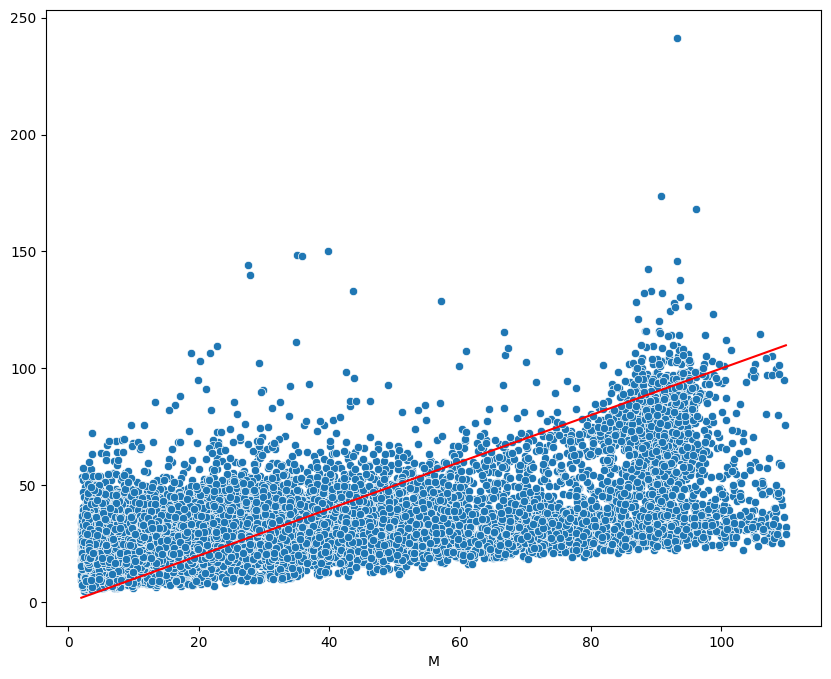

In [ ]:
plt.figure(figsize=(10,8))
xyMin, xyMax = yTs.min(), yTs.max()
sns.lineplot(x=[xyMin, xyMax], y=[xyMin, xyMax], color='red')
sns.scatterplot(x=yTs, y=yPred);

Data is not coming out according to our predictions, so we are going to opt for some other regression algorithm


In [ ]:
from sklearn.ensemble import RandomForestRegressor



In [ ]:
reg = RandomForestRegressor()
reg.fit(xTr, yTr)
yPred = reg.predict(xTs)
print(f'MSE: {mean_squared_error(yTs, yPred):0.2f}, R2: {r2_score(yTs, yPred):0.4f}')

MSE: 39.68, R2: 0.9394


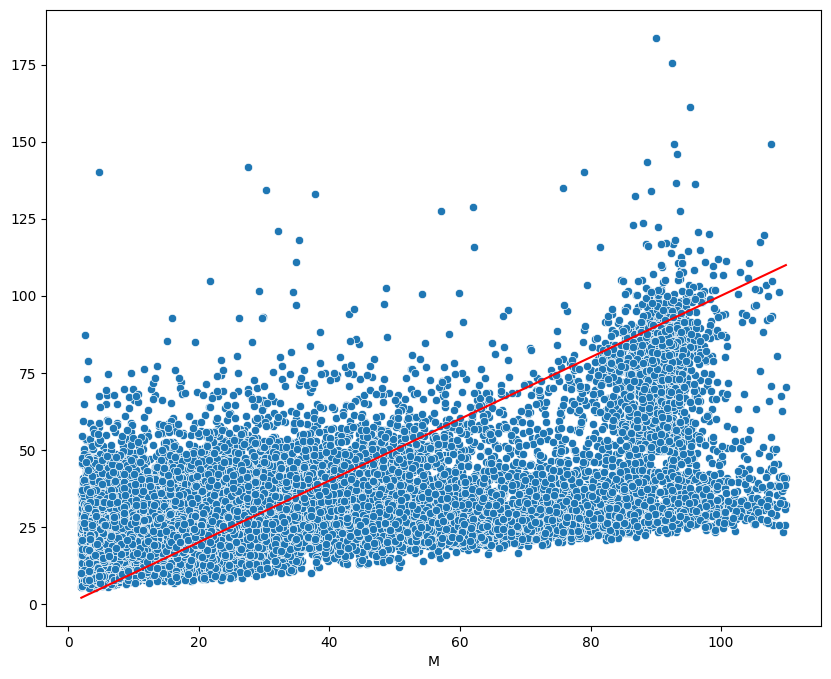

In [ ]:
plt.figure(figsize=(10,8))
xyMin, xyMax = yTs.min(), yTs.max()
sns.lineplot(x=[xyMin, xyMax], y=[xyMin, xyMax], color='red')
sns.scatterplot(x=yTs, y=yPred);